## Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Loading Dataset

In [5]:
# Load data
data = pd.read_csv('Housing.csv')

# Show top 5 rows
print(data.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


# Information and Preprocessing


In [8]:
# Check missing values and data types
print(data.info())

# Check for nulls
print(data.isnull().sum())

# Convert categorical columns to numeric using get_dummies
data_encoded = pd.get_dummies(data, drop_first=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom        

# Exploratory Data Analysis

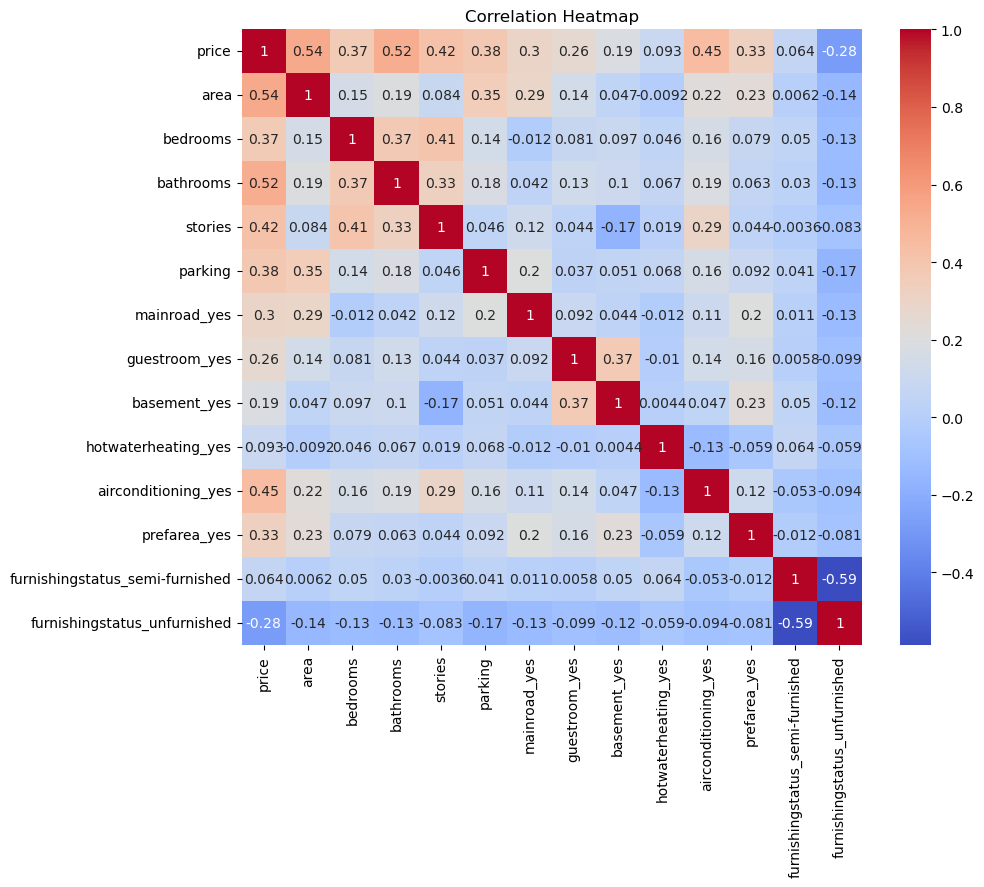

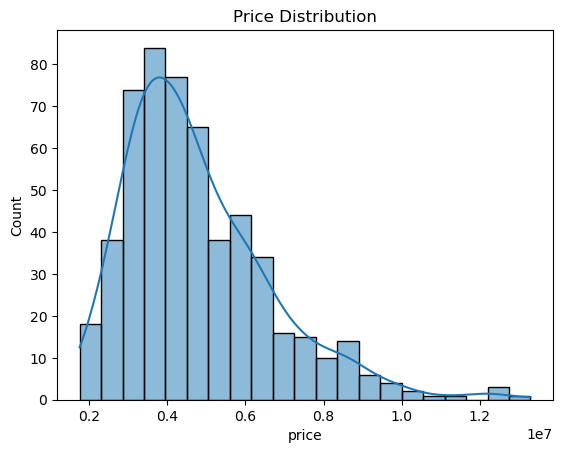

In [11]:
# Check correlations
plt.figure(figsize=(10,8))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Distribution of Price
sns.histplot(data_encoded['price'], kde=True)
plt.title("Price Distribution")
plt.show()

# Splitting The Data

In [14]:
X = data_encoded.drop('price', axis=1)
y = data_encoded['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training Models

# A. Linear Regression

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# B. Decision Tree Regressor

In [21]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# C. Random Forest Regressor

In [24]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Model Evaluatuion

In [27]:
def evaluate(y_test, y_pred, model_name):
    print(f"----- {model_name} -----")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    r2 = r2_score(y_test, y_pred)
    print("R2 Score:", r2)
    print()
    
    return r2  
# Evaluation all models
score_lr = evaluate(y_test, y_pred_lr, "Linear Regression")
score_dt = evaluate(y_test, y_pred_dt, "Decision Tree")
score_rf = evaluate(y_test, y_pred_rf, "Random Forest")

----- Linear Regression -----
MAE: 970043.403920164
MSE: 1754318687330.6643
RMSE: 1324506.9600914388
R2 Score: 0.6529242642153184

----- Decision Tree -----
MAE: 1195266.0550458715
MSE: 2642802637614.6787
RMSE: 1625669.904259373
R2 Score: 0.4771459275854347

----- Random Forest -----
MAE: 1021546.0353211008
MSE: 1961585044320.3433
RMSE: 1400565.9728553821
R2 Score: 0.611918531405699



# Check Best Model

In [30]:
# checking which model is best
best_score = max(score_lr, score_dt, score_rf)
if best_score == score_lr:
    best_model = lr
    model_name = "Linear Regression"
elif best_score == score_dt:
    best_model = dt
    model_name = "Decision Tree"
else:
    best_model = rf
    model_name = "Random Forest"

# Use Best Model

In [33]:
# using best model
new_prediction = best_model.predict(X_test[:5]) 
print("Best Model:", model_name)
print("Predicted Prices:", new_prediction)


Best Model: Linear Regression
Predicted Prices: [5164653.90033967 7224722.29802166 3109863.24240338 4612075.32722559
 3294646.25725955]


# Predict House prices of Test Set

In [36]:
y_pred = rf.predict(X_test)

# first 5 price predictions
print("Predicted Prices:", y_pred[:5])

# actual prices
print("Actual Prices:", y_test[:5].values)

Predicted Prices: [5377680.   7287070.   3747528.75 4502120.   3748885.  ]
Actual Prices: [4060000 6650000 3710000 6440000 2800000]


# Predict New House price ( custom input)

In [39]:
# Sample new house features
new_house = {
    'area': 5000,
    'bedrooms': 3,
    'bathrooms': 2,
    'stories': 2,
    'parking': 1,
    'mainroad_yes': 1,
    'guestroom_yes': 0,
    'basement_yes': 1,
    'hotwaterheating_yes': 0,
    'airconditioning_yes': 1,
    'prefarea_yes': 1,
    'furnishingstatus_semi-furnished': 1,
    'furnishingstatus_unfurnished': 0
}

# Convert to DataFrame
input_df = pd.DataFrame([new_house])

# Predict price
predicted_price = rf.predict(input_df)
print("Predicted House Price:", predicted_price[0])

Predicted House Price: 7604800.0


# Predict New House Price (user input)

In [ ]:
def predict_price():
    area = int(input("Enter area (in sq ft): "))
    bedrooms = int(input("Enter number of bedrooms: "))
    bathrooms = int(input("Enter number of bathrooms: "))
    stories = int(input("Enter number of stories: "))
    parking = int(input("Enter number of parking spots: "))
    mainroad = input("Is it on main road? (yes/no): ")
    guestroom = input("Is there a guest room? (yes/no): ")
    basement = input("Is there a basement? (yes/no): ")
    hotwaterheating = input("Hot water heating? (yes/no): ")
    airconditioning = input("Air conditioning available? (yes/no): ")
    prefarea = input("Preferred area? (yes/no): ")
    furnishingstatus = input("Furnishing status? (semi-furnished/unfurnished/furnished): ")

    house = {
        'area': area,
        'bedrooms': bedrooms,
        'bathrooms': bathrooms,
        'stories': stories,
        'parking': parking,
        'mainroad_yes': 1 if mainroad == 'yes' else 0,
        'guestroom_yes': 1 if guestroom == 'yes' else 0,
        'basement_yes': 1 if basement == 'yes' else 0,
        'hotwaterheating_yes': 1 if hotwaterheating == 'yes' else 0,
        'airconditioning_yes': 1 if airconditioning == 'yes' else 0,
        'prefarea_yes': 1 if prefarea == 'yes' else 0,
        'furnishingstatus_semi-furnished': 1 if furnishingstatus == 'semi-furnished' else 0,
        'furnishingstatus_unfurnished': 1 if furnishingstatus == 'unfurnished' else 0
    }

    input_df = pd.DataFrame([house])
    predicted = rf.predict(input_df)
    return predicted[0]

# Call function 
price = predict_price()
print("Predicted House Price:", price)